In [1]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import stats
from statistics import mode
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
from statistics import median
from statistics import mode

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data
### usually this block prints out "nd2reader module not found. Reading of .nd2 files disabled." on the first run
### this is fine (unless you need to read .nd2 files), just re-run this block to make the error go away

C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
def show_raw_images(row, ax, i, frame_key):
    plt.gray()
    index_add = arr_length * (row -1)
    if time_array[i] == 0:
        image = np.zeros((1440,1920))
        ax.set_title('[no image]', fontsize=10)
    else:
        image = tiff_file.imread(files[i+index_add],key=[frame_key])
        ax.set_title("~" + str(time_array[i]) + " hrs (row"+str(row)+") -->", fontsize=10)
    ax.imshow(image) #cmap = 'gray'
    ax.axis('off')
    plt.tight_layout(pad=.2)
    
def show_image_histograms(row, ax, i, frame_key):
    index_add = arr_length * (row -1)
    if time_array[i] == 0:
        plot = np.zeros((1440,1920))
        ax.set_title('[no image]', fontsize=10)
        ax.imshow(plot, cmap = 'gray')
    else:
        raw_image = tiff_file.imread(files[i+index_add],key=[frame_key])
        #ax.set_title("~" + str(time_array[i]) + " hrs (row"+str(row)+") --> threshold", fontsize=10)
        ax.hist(raw_image.ravel(), bins="auto")
    #ax.axis('off')
    plt.tight_layout(pad=.2)
    
def all_pixel_values(frame_key, i):
    all_vals_list = []
    time_index = i
    for l in range(len(files_list)):
        list_to_add = files_list[l]
        if l < 2:
            for j in range(0,54, 9):
                #print(list_to_add[j])
                im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
                im_ravel = filtimage_and_hist(im_array, 1000)
                all_vals_list.extend(im_ravel)
        else:
            for j in range(0,26, 9):
                #print(list_to_add[j+time_index])
                im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
                im_ravel = filtimage_and_hist(im_array, 1000)
                all_vals_list.extend(im_ravel)
    #print(len(all_vals_list))
    return all_vals_list
    
def zerolistmaker(n):
    listofzeros = ['none found'] * n
    return listofzeros

def filtimage_and_hist(image, filtersize):
    image = (image*1.0) - ((uf(image,filtersize))*1)  #(image) - unifrom-filtered(image) subtracts background
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im


In [ ]:
raw_image = tiff_file.imread(files[0],key=[0])
im = filtimage_and_hist(raw_image, 1000)
print(im.min())
print(np.abs(im.min()))

In [3]:
directory = "Z"
exp1 = "9-5-22_s1_theBigOne"
exp2 = "9-5-22_s2_theBigOne"
exp3 = "10-15-22_s1_theBigOne2"
exp4 = "10-15-22_s2_theBigOne2"
### "data_dir" is the pathway to the folder holding the tiff files to be analyzed 
data_dir_95_s1 = directory+":\\Gregor L\\__Kai Colloids\\"+exp1+"\\all tiff files\\" 
data_dir_95_s2 = directory+":\\Gregor L\\__Kai Colloids\\"+exp2+"\\all tiff files\\" 
data_dir_1015_s1 = directory+":\\Gregor L\\__Kai Colloids\\"+exp3+"\\all tiff files\\" 
data_dir_1015_s2 = directory+":\\Gregor L\\__Kai Colloids\\"+exp4+"\\all tiff files\\" 
data_saveto = directory+":\\Gregor L\\__Kai Colloids\\pixel intensity analysis\\" #bottom_row_t01\\

files_1015_s1 = glob.glob(data_dir_1015_s1+"*_t*")  
files_1015_s2 = glob.glob(data_dir_1015_s2+"*_t*") 
add_zeros = zerolistmaker((len(files_1015_s1)*2))
files_95_s1 = glob.glob(data_dir_95_s1+"*_t*")
files_95_s1.extend(add_zeros)
files_95_s2 = glob.glob(data_dir_95_s2+"*_t*") 
files_95_s2.extend(add_zeros)
#print("found %i files" % len(files_95_s1))
print (' \t'+ exp1 + ' \t' + exp2 + ' \t' + exp3 + ' \t' + exp4)
for i,f in enumerate(files_1015_s1): 
    print (' %i \t %s \t\t %s \t\t %s \t\t %s' % (i, f.split('\\')[-1], files_1015_s2[i].split('\\')[-1], 
                                files_95_s1[i].split('\\')[-1], files_95_s2[i].split('\\')[-1]))

 	9-5-22_s1_theBigOne 	9-5-22_s2_theBigOne 	10-15-22_s1_theBigOne2 	10-15-22_s2_theBigOne2
 0 	 row1_t1.tif 		 row1_t1.tif 		 row1_t01.tif 		 row1_t01.tif
 1 	 row1_t2.tif 		 row1_t2.tif 		 row1_t02.tif 		 row1_t02.tif
 2 	 row1_t3.tif 		 row1_t3.tif 		 row1_t03.tif 		 row1_t03.tif
 3 	 row1_t4.tif 		 row1_t4.tif 		 row1_t04.tif 		 row1_t04.tif
 4 	 row1_t5.tif 		 row1_t5.tif 		 row1_t05.tif 		 row1_t05.tif
 5 	 row1_t6.tif 		 row1_t6.tif 		 row1_t06.tif 		 row1_t06.tif
 6 	 row1_t7.tif 		 row1_t7.tif 		 row1_t07.tif 		 row1_t07.tif
 7 	 row1_t8.tif 		 row1_t8.tif 		 row1_t08.tif 		 row1_t08.tif
 8 	 row1_t9.tif 		 row1_t9.tif 		 row1_t09.tif 		 row1_t09.tif
 9 	 row2_t1.tif 		 row2_t1.tif 		 row2_t01.tif 		 row2_t01.tif
 10 	 row2_t2.tif 		 row2_t2.tif 		 row2_t02.tif 		 row2_t02.tif
 11 	 row2_t3.tif 		 row2_t3.tif 		 row2_t03.tif 		 row2_t03.tif
 12 	 row2_t4.tif 		 row2_t4.tif 		 row2_t04.tif 		 row2_t04.tif
 13 	 row2_t5.tif 		 row2_t5.tif 		 row2_t05.tif 		 row2_t05.tif
 14 	 row

In [4]:
frame_names = ["1-3 kA-WT", "WT (no kA)", "EA KaiC", "AE KaiC"]
### array containing the name for each frame in a tiff file to be run 
### e.g. frame 1 is an image of the "50% bKaiB" condition, frame 2 is an image of the "35% bKaiB" condition, etc.

total_rows = 6

time_array = [1, 4, 7, 10, 13, 19, 22, 25, 28]
#s1 [1.1, 4.0, 7.4, 10.3, 14.7, 17.7, 20.3, 23.8, 27.0]
#s2 [1.2, 4.4, 7.8, 10.8, 15.2, 18.3, 20.8, 24.3, 28.0]
### array containing the time points corresponding to consecutive tiff files
### e.g. tiff files "bottom_row_t1", "middle_row_t1", and "top_row_t1" all correspond to t = 0.5 hrs, time_array[0]

pixel_size = 0.364 # 4*0.091 = 0.364
### pixel size (microns per pixel) of frames/ images in the tiff files --- 40x olympus objective => 0.091 um/px
### IF 2x2 BINNING: multiply the original pixel size by 2^2 = 4, e.g. 4*(0.091 um/px) = 0.364 um/px

fig_size = 10,10/1.618
###  size of output figures
font_size = 10
### font size
dpi_num = 600
### image quality level (recommendation: 600)

eg_im= tiff_file.imread(files_1015_s1[0])
print("tiff file dimensions: "+ str(eg_im.shape))

num_times = int((len(files_1015_s1))/total_rows)
print("total number of time points: "+ str(num_times))
if num_times % 2 == 0:
    num_rows = int(num_times/2)
else:
    num_rows = int((num_times+1)/2)
print("(for image previews) number of rows = " + str(num_rows))

list_length = 49766400
means = np.zeros((4,num_times))
medians = np.zeros((4,num_times))
modes = np.zeros((4,num_times))
std_devs = np.zeros((4,num_times))
WTkA_pixel_val = np.zeros((num_times, list_length))
WTnokA_pixel_val = np.zeros((num_times, list_length))
EA_pixel_val = np.zeros((num_times, list_length))
AE_pixel_val = np.zeros((num_times, list_length))

C:\Users\gleech\Documents\GitHub\kai codes\best SIA\tiff_file.py:724: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.vstack((p.asarray() if p else nopage)


tiff file dimensions: (5, 1440, 1920)
total number of time points: 9
(for image previews) number of rows = 5


In [5]:
bins_num = 5000 #int(49766400 / 100000)

all_counts = np.zeros((num_times, bins_num))
all_bins = np.zeros((num_times, bins_num))

AE_all_probs = np.zeros((num_times, bins_num))
EA_all_probs = np.zeros((num_times, bins_num))
WTkA_all_probs = np.zeros((num_times, bins_num))
WTnokA_all_probs = np.zeros((num_times, bins_num))
AE_all_bins = np.zeros((num_times, bins_num+1))
EA_all_bins = np.zeros((num_times, bins_num+1))
WTkA_all_bins = np.zeros((num_times, bins_num+1))
WTnokA_all_bins = np.zeros((num_times, bins_num+1))

print("pixels per bin " +  str(int(49766400/bins_num)))
all_FWHM = [0.0]*num_times

pixels per bin 9953


In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(bins[:-1], counts, '-o', c=cmap(0.65))
plt.ylabel("FWHM",fontsize=font_size)
plt.xlabel("time (hours)",fontsize=font_size) 
ax.tick_params(direction='in', which='both', labelsize=font_size-2)
plt.title(title, fontsize=font_size)
#plt.ylim(100, 500)
plt.show()
#fig.savefig(data_saveto+"FWHM- "+title+".jpg", dpi=600)

In [ ]:
for i in range(num_times):
    all_times_all_values[i] = all_pixel_values(0, i)
    #means[frame_key][i] = sum(all_times_all_values[i]) / len(all_times_all_values[i])
    #medians[frame_key][i] = median(all_times_all_values[i])
    #modes[frame_key][i] = mode(all_times_all_values[i])
    #std_devs[frame_key][i] = np.std(all_times_all_values[i])
    

In [6]:
files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]

for i in range(num_times):
    #all_times_all_values[i] = all_pixel_values(frame_key, i)
    WTkA_pixel_val[i] = all_pixel_values(0, i)
    #WTnokA_pixel_val[i] = all_pixel_values(1, i)
    EA_pixel_val[i] = all_pixel_values(2, i)
    AE_pixel_val[i] = all_pixel_values(3, i)
    #WTkA_all_probs[i], WTkA_all_bins[i] = np.histogram(all_pixel_values(0, i), bins=bins_num, density = True)
    #WTnokA_all_probs[i], WTnokA_all_bins[i] = np.histogram(all_pixel_values(1, i), bins=bins_num, density = True)
    #EA_all_probs[i], EA_all_bins[i] = np.histogram(all_pixel_values(2, i), bins=bins_num, density = True)
    #AE_all_probs[i], AE_all_bins[i] = np.histogram(all_pixel_values(3, i), bins=bins_num, density = True)
    
    
print(len(AE_all_bins[0]))

5001


In [7]:
def show_histograms(i, ax, array):
    #print(files[i+index_add])
    if time_array[i] == 0:
        empty_im = np.zeros((1440,1920))
        ax.imshow(empty_im, cmap = 'gray')
        ax.set_title('[no image]', fontsize=10)
    else:
        ax.hist(array[i], density=True, bins=bins_num)
        titles = condition + ", t= " + str(time_array[i]) + " hrs, bins= "+str(bins_num)+")"
        ax.set_title(titles, fontsize=font_size-1)
        ax.set( ylabel='probability')
        ax.set( xlabel='pixel intensity')
        ax.set_xlim(0, 2500)
        ax.set_ylim(0, 0.0095)
        ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
        ax.xaxis.get_label().set_fontsize(font_size-2)
        ax.yaxis.get_label().set_fontsize(font_size-2)
    plt.tight_layout(pad=.25)

cmap_num = (num_times*2) - 3
def stack_histograms(i, ax, array):
    #print(files[i+index_add])
    ax.hist(array[i], density=True, bins=bins_num, color=cmap(0.9-(i/cmap_num)))
    
def FWHM(X,Y):
    frac = 2 #For FWHM frac = 2, FWtenthM, frac = 10, etc
    half_max = max(Y) / 2.
    #find when function crosses line half_max (when sign of diff flips)
    d = Y - (max(Y) / frac)
    #plot(X[0:len(d)],d) #if you are interested
    #find the left and right most indexes
    indexes = np.where(d > 0)[0]
    return abs(X[indexes[-1]] - X[indexes[0]]) #return the difference (full width)

def select_data(frame_key):
    if frame_key == 0:
        print("WT+kaiA histograms")
        print((WTkA_all_bins[0][0:10]))
        return WTkA_pixel_val, matplotlib.cm.get_cmap('Reds'), "1:3 :: KaiA:WT KaiC, "+str(time)+" hrs"
    elif frame_key == 1:
        print("WT w/o kaiA histograms")
        return WTnokA_pixel_val, matplotlib.cm.get_cmap('Blues'), "WT KaiC (no KaiA), "+str(time)+" hrs"
    elif frame_key == 2:
        print("EA histograms")
        return EA_pixel_val, matplotlib.cm.get_cmap('Greens'), "EA KaiC (fixed binding), "+str(time)+" hrs"
    elif frame_key == 3:
        print("AE histograms")
        return AE_pixel_val, matplotlib.cm.get_cmap('Greys'), "AE KaiC (non-binding), "+str(time)+" hrs"

# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    print(val)
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

In [63]:
import matplotlib.mlab as mlab
from scipy.stats import norm
import matplotlib.patches as mpatches

<IPython.core.display.Javascript object>


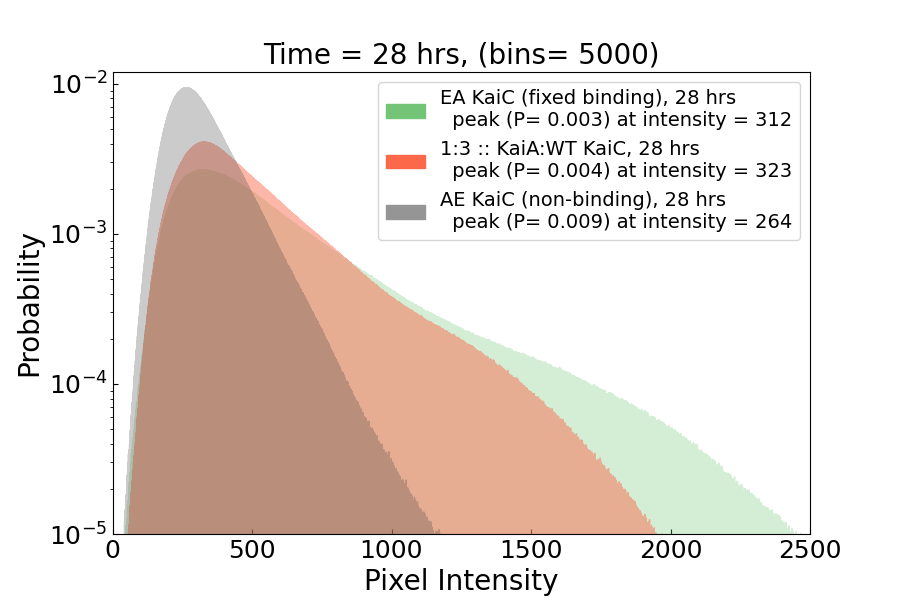

EA histograms
49766400
WT+kaiA histograms
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AE histograms


In [135]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', direction='in', which='major', labelsize=font_size-2)

time_key = 8
time = time_array[time_key]
title = "Time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 0 #0.02*time_key + add/10

ax.set_yscale("log")
pixel_vals, cmap, data_label = select_data(2)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.3 + alpha_num, color=cmap(cmap_num) ) #, label= data_label)
color0=cmap(cmap_num)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text0= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
patch0 = mpatches.Patch(color=cmap(cmap_num), label=data_label + "\n" + text0)

pixel_vals, cmap, data_label = select_data(0)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.48+ alpha_num, color=cmap(cmap_num) )#, label= data_label)
color1=cmap(cmap_num)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text1= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
patch1 = mpatches.Patch(color=cmap(cmap_num), label=data_label + "\n" + text1)

pixel_vals, cmap, data_label = select_data(3)
#mean,std = norm.fit(pixel_vals)
#ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, color=cmap(cmap_num))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="step", density=True, bins=bins_num, stacked=True, 
                          alpha=0.27+ alpha_num, color=cmap(cmap_num+0.3) )#, label= data_label)
color2=cmap(cmap_num)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text2= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
patch2 = mpatches.Patch(color=cmap(cmap_num), label=(data_label + "\n" + text2))
xmin, xmax = plt.xlim()
#x = np.linspace(0, 1000, 5000)
#y = (norm.pdf(x, mean, std))**1
#plt.plot(x, y)
#new_bins = bins[:-1]
#fit2 = np.poly1d(np.polyfit(new_bins, counts, 30))
#fit2_values = fit2(bins[100:-2000])
#plt.plot(bins[100:-2000], fit2_values)

    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel Intensity', fontsize=font_size)
plt.ylim(0.00001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 2500)
#plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

ax.legend(handles=[patch0, patch1, patch2], markerscale=2., fontsize=font_size-6)

'''idk, labels = ax.get_legend_handles_labels()
print(labels[1])
labels[0] = labels[0] + "\n" + text0
labels[1] = labels[1] + "\n" + text1
labels[2] = labels[2] + "\n" + text2
print(labels[1])
print(labels)

legend = ax.legend(idk, labels, markerscale=2., fontsize=font_size-6)
handles = legend.legendHandles
colors = [color0, color1, color2]
for i, handle in enumerate(handles):
    handle.set_facecolor(colors[i])
'''
plt.show()
fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=1000, bbox_inches ='tight')

<IPython.core.display.Javascript object>


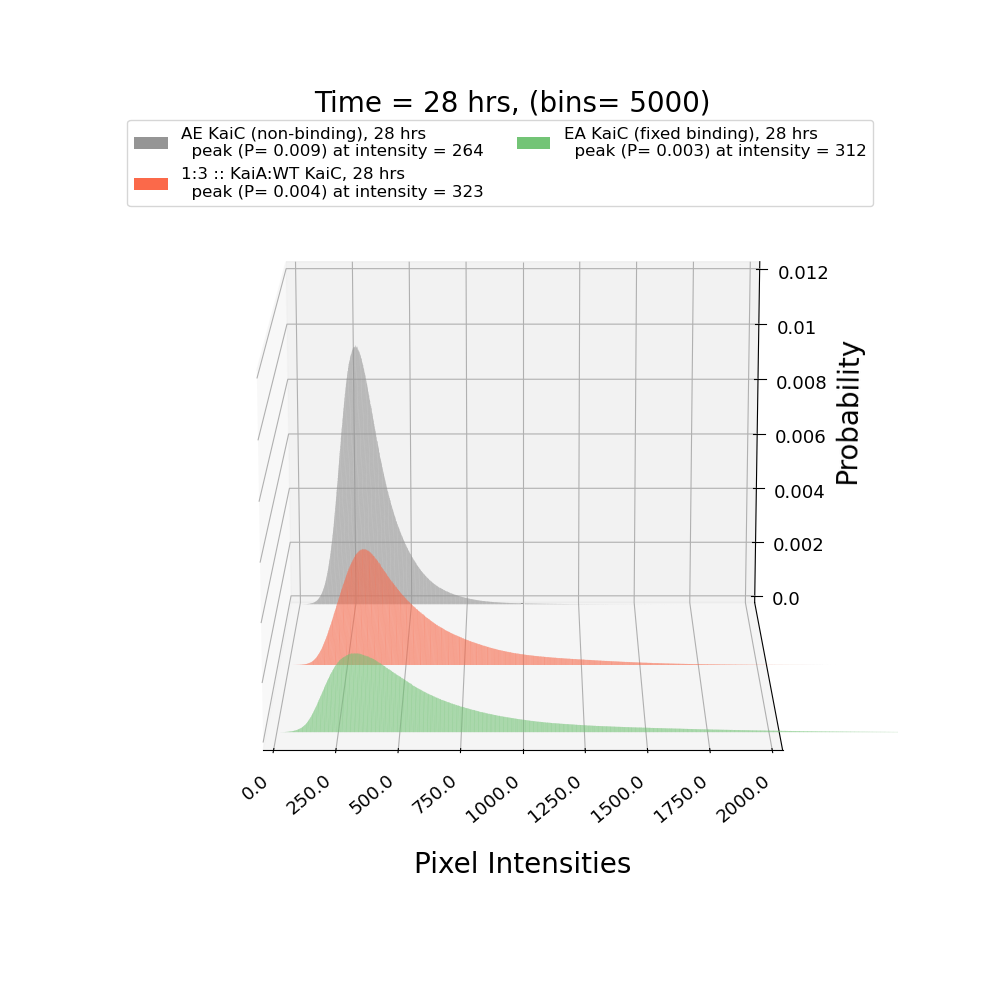

AE histograms
WT+kaiA histograms
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
EA histograms


<ipython-input-115-08003a367f76>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 40, ha="right")
<ipython-input-115-08003a367f76>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(ax.get_zticks(), ha='left')
<ipython-input-115-08003a367f76>:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


In [115]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=font_size-7)

time_key = 8
time = time_array[time_key]
title = "Time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
cmap_num = 0.5  #0.99-((time_key-add)*0.11)
alpha_num = 1  #0.02*time_key + add/10

yticks = [0, 1, 2]

pixel_vals, cmap, data_label = select_data(3)
data_label0 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
ax.bar(bins[:-1], counts, zs=(2), zdir='y', color=cmap(cmap_num), alpha=alpha_num, label=text)

pixel_vals, cmap, data_label = select_data(0)
data_label1 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
ax.bar(bins[:-1], counts, zs=(1), zdir='y', color=cmap(cmap_num), alpha=alpha_num, label=text)

pixel_vals, cmap, data_label = select_data(2)
data_label2 = data_label
counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= data_label+"\n  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)
ax.bar(bins[:-1], counts, zs=(0), zdir='y', color=cmap(cmap_num), alpha=alpha_num, label=text)

ax.set_xlabel('Pixel Intensities', fontsize=font_size)
#ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 7.0)
ax.set_zlabel('Probability', fontsize=font_size, ha="left")
ax.xaxis.labelpad = 40
ax.zaxis.labelpad = 40
ax.set_xlim(0, 2000)
ax.set_zlim(0, 0.012)


#['1', '4', '7', '10', '13', '19', '22', '25', '28']

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticks(), rotation = 40, ha="right")
ax.set_zticklabels(ax.get_zticks(), ha='left')
#ax.ticklabel_format(useOffset=True)

ax.set_title(title, fontsize=font_size)
ax.view_init(elev=15., azim=-90)
ax.legend(loc="upper left",ncol=2, borderaxespad=0, fontsize=font_size-8) #bbox_to_anchor=(0.06, 0.5)
fig = plt.gcf()
fig.tight_layout()
plt.show()
fig.savefig(data_saveto+"3D histograms AE, EA, WT- "+title+".png", dpi=1000)

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.tick_params(axis='both', which='major', labelsize=font_size-7)

frame_key = 3
condition = frame_names[frame_key]
pixel_vals, cmap, data_label = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
#for c, k in zip(colors, yticks):
for i in range(num_times):
    #ax.set_zscale("log")
    time = str(time_array[8-i])+" hrs"
    #ax.set_zlim(0.00001, 0.012)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    counts, bins = np.histogram(pixel_vals[i], bins=bins_num, density = True)
    ax.bar(bins[:-1], counts, zs=(8-i), zdir='y', color=cmap(0.99-(i*0.1)), alpha=1, label=time)
    #counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, 
                                # bins=bins_num, stacked=True, alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    #ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    #ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]

ax.set_xlabel('pixel intensities', fontsize=font_size, labelpad= 8.0)
ax.set_ylabel('time (hours)', fontsize=font_size, labelpad= 7.0)
ax.set_zlabel('probability', fontsize=font_size, labelpad= 8.0)
ax.set_xlim(0, 2000)


#['1', '4', '7', '10', '13', '19', '22', '25', '28']

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
ax.set_yticklabels(['1', '4', '7', '10', '13', '19', '22', '25', '28'])

ax.set_title(title, fontsize=font_size)
ax.view_init(elev=15., azim=-70)
ax.legend(loc = 'upper left')
plt.show()
#fig.savefig(data_saveto+"3D histograms- "+title+".jpg", dpi=1000)

In [ ]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', direction='in', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
title = "time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
alpha_num =  #0.02*time_key + add/10
cmap_num = 0.6

#ax.set_yscale("log")
pixel_vals, cmap, data_label = select_data(3)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.6, color=cmap(cmap_num), label= data_label)
pixel_vals, cmap, data_label = select_data(0)

max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text= "={:.3f}, y={:.3f}".format(max_bin, max_prob)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.5, color=cmap(cmap_num), label= data_label)

ax.annotate(text, xy=(1300,0.009), fontsize=font_size)  #xytext=(0.94,0.96)



pixel_vals, cmap, data_label = select_data(2)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.45, color=cmap(cmap_num), label= data_label)

#counts, bins = np.histogram(pixel_vals[time_key], bins=bins_num, density = True)
#ax.bar(bins[:-1], counts, color=cmap(0.99-((time_key-add)*0.1)), 
        #alpha=0.6+alpha_num, label=data_label)
#pixel_vals, cmap, data_label = select_data(0)
#ax.bar(probabilities[time_key], bins[time_key][:-1], color=cmap(0.99-((time_key-add)*0.1)), alpha=0.5+alpha_num, label=data_label)
#pixel_vals, cmap, data_label = select_data(2)
#ax.bar(probabilities[time_key], bins[time_key][:-1], color=cmap(0.99-((time_key-add)*0.1)), alpha=0.45+alpha_num, label=data_label)
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
#ax.text(1300,0.009, "fit equation: " + equation, fontsize=font_size-2)
    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel Intensity', fontsize=font_size)
#plt.ylim(0.00001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
A, W, E = ax.get_legend_handles_labels()
print(A, W, E)
plt.legend(A, W, E, fontsize=font_size-6)
plt.show()
#fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=1000, bbox_inches ='tight')

In [ ]:
%matplotlib notebook
font_size = 20
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', direction='in', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
title = "time = "+str(time) +" hrs, (bins= "+str(bins_num)+")"

add = 0
alpha_num = 0.02*time_key + add/10

#ax.set_yscale("log")
pixel_vals, cmap, data_label = select_data(3)
print(len(pixel_vals[time_key]))
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.6 + 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text0= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

pixel_vals, cmap, data_label = select_data(0)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.5+ 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text1= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

pixel_vals, cmap, data_label = select_data(2)
counts, bins, bars = ax.hist(pixel_vals[time_key], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=0.45+ 0.02*time_key + add/10, color=cmap(0.99-((time_key-add)*0.11)), label= data_label)
max_bin = bins[np.argmax(counts)]
max_prob = counts.max()
text2= "  peak (P= {:.3f}) at intensity = {:.0f}".format(max_prob, max_bin)

    
plt.ylabel('Probability', fontsize=font_size)
plt.xlabel('Pixel Intensity', fontsize=font_size)
#plt.ylim(0.00001, 0.012)
#plt.ylim(0, 0.012)
#plt.xlim(0, 1500)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)

idk, labels = ax.get_legend_handles_labels()
print(labels[1])
labels[0] = labels[0] + "\n" + text0
labels[1] = labels[1] + "\n" + text1
labels[2] = labels[2] + "\n" + text2
print(labels[1])
print(labels)
plt.legend(idk, labels, markerscale=2., fontsize=font_size-6)

plt.show()
#fig.savefig(data_saveto+"logy EA, AE, WT histograms- "+title+".png", dpi=1000, bbox_inches ='tight')

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

frame_key = 0
condition = frame_names[frame_key]
all_times_all_values, cmap = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

for i in range(num_times):
    time = str(time_array[i])+ " hrs"
    #alpha_num = 0.83 + 0.02*i
    alpha_num = 0.99 - 0.08*i
    #print(0.99-(i*0.11))       #0.10 + (i*0.11)  
    print(alpha_num)
    ax.set_yscale("log")
    #ax.hist(all_times_all_values[i], histtype="step", density=True, bins=bins_num, stacked=True, 
       #                   alpha=1, color=cmap(0.99-(i*0.11)), fill=False)
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
#fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

frame_key = 0
condition = frame_names[frame_key]
all_times_all_values, cmap = select_data(frame_key)
title = frame_names[frame_key] +" (bins= "+str(bins_num)+")"

for i in range(num_times):
    time = str(time_array[i])+ " hrs"
    #alpha_num = 0.83 + 0.02*i
    alpha_num = 0.99 - 0.08*i
    #print(0.99-(i*0.11))       #0.10 + (i*0.11)  
    print(alpha_num)
    ax.set_yscale("log")
    #ax.hist(all_times_all_values[i], histtype="step", density=True, bins=bins_num, stacked=True, 
       #                   alpha=1, color=cmap(0.99-(i*0.11)), fill=False)
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
plt.xlim(0, 2500)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
#fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(time_array, all_FWHM, '-o', c=cmap(0.65))
plt.ylabel("FWHM",fontsize=font_size)
plt.xlabel("time (hours)",fontsize=font_size) 
ax.tick_params(direction='in', which='both', labelsize=font_size-2)
plt.title(title, fontsize=font_size)
plt.ylim(100, 500)
plt.show()
fig.savefig(data_saveto+"FWHM- "+title+".jpg", dpi=600)

In [ ]:
%matplotlib notebook
font_size = 16
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size-2)

time_key = 0
time = time_array[time_key]
all_times_all_values, cmap = select_data(frame_key)
title = str(time) +"hrs, (bins= "+str(bins_num)+")"


    alpha_num = 0.83 + 0.02*i
    #alpha_num = 0.99 - 0.02*i
    #print(0.99-(i*0.1))                   #logy??
    #print(alpha_num)
    ax.set_yscale("log")
    counts, bins, bars = ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num, stacked=True, 
                          alpha=alpha_num, color=cmap(0.99-(i*0.11)), label=time)
    all_FWHM[i] = FWHM(bins[:-1],counts)
    all_counts[i] = counts 
    all_bins[i] = bins[:-1]
    #print(all_FWHM[i])
    #counts, bins, bars =ax.hist(all_times_all_values[i], histtype="stepfilled", density=True, bins=bins_num)
    #print(counts.shape, bins.shape, bars)
    
print(all_counts.shape, all_bins.shape)
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
plt.ylim(0.00001, 0.015)
#plt.xlim(0, 2000)
plt.title(title, fontsize=font_size)
plt.legend()
plt.show()
fig.savefig(data_saveto+"logy stacked histograms- "+title+".jpg", dpi=2000)

In [ ]:
%matplotlib notebook
font_size = 10

fig, axs = plt.subplots(3, 3, figsize=(9.5,9))
for i, ax in enumerate(axs.flatten()):
    show_histograms(i, ax, all_times_all_values)
plt.show()
fig.savefig(data_saveto+"all histograms for -"+condition+" (bins= "+str(bins_num)+").jpg", dpi=800)

In [ ]:
frame_key = 2
time_index = 8
condition = frame_names[frame_key]
time = time_array[time_index]
details = condition + ", t= " + str(time) + " hrs, fsize= 1000"

#def all_pixel_values
files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]
all_vals_list = []
for l in range(4):
    list_to_add = files_list[l]
    if l < 2:
        for j in range(0,54, arr_length):
            #print(list_to_add[j])
            im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
            im_array = filtimage(im_array, 1000)
            im_ravel = im_array.ravel()
            all_vals_list.extend(im_ravel)
    else:
        for j in range(0,26, arr_length):
            #print(list_to_add[j+time_index])
            im_array = tiff_file.imread(list_to_add[j+time_index],key=[frame_key]) 
            im_array = filtimage(im_array, 1000)
            im_ravel = im_array.ravel()
            all_vals_list.extend(im_ravel) 
    #print(len(im_ravel))
    #print(list_to_add[0])
    #print('  ')
print("pixel intensities found for all images of "+ details)
list_length = 49766400  #len(all_vals_list)
print("total number of pixel values = "+ str(list_length))
mean = sum(all_vals_list) / len(all_vals_list)
print("mean intensity value = %5.3f" %(mean))

In [ ]:



frame_key = 3
condition = frame_names[frame_key]
#details = condition + ", t= " + str(time) + " hrs, fsize= 1000"
details = condition + ", fsize= 1000"

files_list = [files_1015_s1, files_1015_s2, files_95_s1, files_95_s2]
all_times_all_values = np.zeros((num_times, list_length))

for i in range(num_times):
    all_times_all_values[i] = all_pixel_values(frame_key, i)
    means[frame_key][i] = sum(all_times_all_values[i]) / len(all_times_all_values[i])
    medians[frame_key][i] = median(all_times_all_values[i])
    modes[frame_key][i] = mode(all_times_all_values[i])
    std_devs[frame_key][i] = np.std(all_times_all_values[i])

print("pixel intensities found for all images of "+ details)
print("means:")
print(means)
print(' ')
print("medians:")
print(medians)
print(' ')
print("modes:")
print(modes)
print(' ')
print("std_devs:")
print(std_devs)
print(' ')

In [ ]:
print("pixel intensities found for all images of "+ details)
print("means:")
print(np.stack(means))
print(' ')
print("medians:")
print(medians)
print(' ')
print("modes:")
print(modes)
print(' ')
print("std_devs:")
print(std_devs)
print(' ')

In [ ]:
### plot average values and std. error for L1 correlation lengths
cmap_num = (arr_length*2) - 2
fig_size = 9.5, 20   #20/1.618
fig = plt.figure(figsize=(fig_size))
gs = fig.add_gridspec(4, top=0.95, hspace=0.09)
axs = gs.subplots(sharex=False, sharey=False)
#fig, axs = plt.subplots(3, figsize=(fig_size))
markerSize = 8
font_size = 16
title = condition 

ylim = 200, 650

#axs[0].set_title(title, fontsize= (font_size))
axs[0].set( ylabel='mean intensity')
axs[0].set_ylim(ylim)
axs[0].plot(time_array, means[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[0].plot(time_array, means[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[0].plot(time_array, means[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[0].plot(time_array, means[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[0].legend()

axs[1].set( ylabel='median intensity')
axs[1].set_ylim(ylim)
axs[1].plot(time_array, medians[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[1].plot(time_array, medians[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[1].plot(time_array, medians[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[1].plot(time_array, medians[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[1].legend()

axs[2].set( ylabel='mode intensity')
axs[2].set_ylim(ylim)
axs[2].plot(time_array, modes[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[2].plot(time_array, modes[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[2].plot(time_array, modes[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[2].plot(time_array, modes[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[2].legend()

axs[3].set( ylabel='std deviation')
axs[3].set( xlabel="Time (hrs after adding KaiC)")
axs[3].set_ylim(100, 550)
axs[3].plot(time_array, std_devs[0],'-o', ms=markerSize, c='r', label = frame_names[0])
#axs[3].plot(time_array, std_devs[1],'-o', ms=markerSize, c='b', label = frame_names[1])
axs[3].plot(time_array, std_devs[2],'-o', ms=markerSize, c='g', label = frame_names[2])
axs[3].plot(time_array, std_devs[3],'-o', ms=markerSize, c='k', label = frame_names[3])
axs[3].legend()
    
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
    ax.xaxis.get_label().set_fontsize(font_size)
    ax.yaxis.get_label().set_fontsize(font_size)

#plt.subplot_tool()
plt.show()
fig.savefig(data_saveto+"all histograms results.jpg", dpi=800)

In [ ]:
%matplotlib notebook
key = 0
condition = frame_names[key]
num_rows = 3
fig_height = num_rows*3#2.3
#time_array.append(0)
fig, axs = plt.subplots(num_rows, 3, figsize=(9.5,fig_height))
for i, ax in enumerate(axs.flatten()):
    show_histograms(i, ax, all_times_all_values)
plt.show()
fig.savefig(data_saveto+"all histograms for -"+condition+" (fsize= 1000).jpg", dpi=800)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(9,6))
ax.tick_params(axis='both', which='major', labelsize=font_size)
plt.hist(all_vals_list, density=True, bins='auto')  # density=False would make counts
plt.ylabel('probability', fontsize=font_size)
plt.xlabel('pixel intensities', fontsize=font_size)
title = details
plt.title(title, fontsize=font_size)
plt.show()
fig.savefig(data_saveto+"histogram for all rows -"+details+".jpg", dpi=dpi_num)

In [ ]:
frame_key = 3
### "frame_key" specifies which frame of each tiff file will be analyzed (each frame of my tiff is for a different condition)
### e.g. "key = 0" dictates that the first frame of each tiff file should be analyzed
condition = frame_names[frame_key]
print("condition: "+condition)

row = 1
### choose which set of tiff files should be analyzed, row1, row2 or row3

fig_height = num_rows*2.3
time_array.append(0)
i = 0
fig, axs = plt.subplots(num_rows, 4, figsize=(10,fig_height))
for j, ax in enumerate(axs.flatten()):
    if j % 2 == 0:
        show_raw_images(row, ax, i, frame_key)
    else:
        show_image_histograms(row, ax, i, frame_key)
        i = i + 1 
plt.show()
time_array.remove(0)
print(time_array)
details = " (row"+str(row)+")"
### option to save this figure (uncomment below)
fig.savefig(data_saveto+"histograms for "+condition+details+".jpg", dpi=dpi_num)

In [ ]:
image = tiff_file.imread(files[9],key=[0])
print(np.median(image))
print(np.mean(image))
print(np.std(image))

return_which = " "

def analyze_image(image, return_which):
    median_val = np.median(image)
    mean_val = np.mean(image)
    std_dev_val = np.std(image)
    if return_which == "mean":
        return mean_val
    if return_which == "median":
        return median_val
    if return_which == "std_dev":
        return std_dev_val
    
analyze_image(image, "mean")

In [ ]:
### "key" specifies which frame of each tiff file will be analyzed (each frame of my tiff is for a different condition)
### e.g. "key = 0" dictates that the first frame of each tiff file should be analyzed, tiff_file.imread(files[i],key=[key]
key = 3
condition = frame_names[key]
print(condition)

### cmap dictates the color gradient used in plots; options: 'Reds' 'Blues' 'Greens' 'Greys' 'Purples' ...
cmap = matplotlib.cm.get_cmap('Greys')  

### Set up empty arrays to save results in
all_means = np.zeros((total_rows,arr_length))
avg_means = np.empty(arr_length)
stderror_means = np.empty(arr_length)

all_medians = np.zeros((total_rows,arr_length))
avg_medians = np.empty(arr_length)
stderror_medians = np.empty(arr_length)

all_std_dev = np.zeros((total_rows,arr_length))
avg_std_dev = np.empty(arr_length)
stderror_std_dev = np.empty(arr_length)

### cmap_num is used the when plotting each curve to adjust the color gradient according to the total number of time points
### e.g. for i in range(arr_length): the color of each curve is determined by c=cmap(0.9-(i/cmap_num))
cmap_num = (arr_length*2) - 2

for i in range(arr_length):    
### "im_corr" is the actual SIA function which filters, bins, and fourier transforms tiff images to generate SIA curves
    all_means[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "mean")
    all_means[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "mean")
    all_means[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "mean")
    all_means[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "mean")
    all_means[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "mean")
    all_means[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "mean")
    
    all_medians[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "median")
    all_medians[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "median")
    all_medians[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "median")
    all_medians[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "median")
    all_medians[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "median")
    all_medians[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "median")
    
    all_std_dev[0,i] = analyze_image(tiff_file.imread(files[i],key=[key]), "std_dev")
    all_std_dev[1,i] = analyze_image(tiff_file.imread(files[i+arr_length],key=[key]), "std_dev")
    all_std_dev[2,i] = analyze_image(tiff_file.imread(files[i+(arr_length*2)],key=[key]), "std_dev")
    all_std_dev[3,i] = analyze_image(tiff_file.imread(files[i+(arr_length*3)],key=[key]), "std_dev")
    all_std_dev[4,i] = analyze_image(tiff_file.imread(files[i+(arr_length*4)],key=[key]), "std_dev")
    all_std_dev[5,i] = analyze_image(tiff_file.imread(files[i+(arr_length*5)],key=[key]), "std_dev")
    
### corresponding x-values calculated according to the length of a SIA curve array (r1_corr_rad_array[0]) and pixel size
avg_means = all_means.mean(axis=0)
stderror_means = all_means.std(axis=0)/np.sqrt(total_rows)

avg_medians = all_medians.mean(axis=0)
stderror_medians = all_medians.std(axis=0)/np.sqrt(total_rows)

avg_std_dev = all_std_dev.mean(axis=0)
stderror_std_dev = all_std_dev.std(axis=0)/np.sqrt(total_rows)
print(avg_means)
print(avg_medians)
print(avg_std_dev)

In [ ]:
### plot average values and std. error for L1 correlation lengths
fig = plt.figure(figsize=(9.5, 20))
gs = fig.add_gridspec(3, top=0.95, hspace=0.09)
axs = gs.subplots(sharex=False, sharey=False)
#fig, axs = plt.subplots(3, figsize=(fig_size))
markerSize = 8
title = condition +" image intensity analysis"

for i in range(arr_length):
    axs[0].set_title(title, fontsize= (font_size))
    axs[0].set( ylabel='mean image intensity')
    #axs[0].set_ylim(0, 400)
    axs[0].plot(time_array[i], avg_means[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[0].errorbar(time_array[i], avg_means[i], yerr = stderror_means[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
    axs[1].set( ylabel='median image intensity')
    #axs[1].set_ylim(0, 60)
    axs[1].plot(time_array[i], avg_medians[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[1].errorbar(time_array[i], avg_medians[i], yerr = stderror_medians[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
    axs[2].set( ylabel='std dev of image intensity')
    #axs[2].set_ylim(0, 60)
    axs[2].plot(time_array[i], avg_std_dev[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    axs[2].errorbar(time_array[i], avg_std_dev[i], yerr = avg_std_dev[i], fmt = 'none', 
                ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
    
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=(font_size-3))
    ax.xaxis.get_label().set_fontsize(font_size)
    ax.yaxis.get_label().set_fontsize(font_size)

#plt.subplot_tool()
plt.show()
fig.savefig(data_saveto+title+".jpg", dpi=dpi_num)